# Importar blibiotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Impoirtar bases de dados 

In [8]:
df1 = pd.read_csv('russia_losses_personnel.csv')
df2 = pd.read_csv('russia_losses_equipment.csv')

# Limpeza e preparação dos dados para analise exploiratoria

In [5]:
df1.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0.0
1,2022-02-26,3,4300,about,0.0
2,2022-02-27,4,4500,about,0.0
3,2022-02-28,5,5300,about,0.0
4,2022-03-01,6,5710,about,200.0


In [10]:
df1.shape

(381, 5)

In [27]:
#Excluir colunas não necessárias pro estudo

df1 = df1.drop(columns=['personnel*', 'POW'])

In [47]:
df2.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN


In [46]:
df2.shape

(381, 18)

In [48]:
New_df = pd.merge(df1, df2, on='date')

In [49]:
New_df.head()

,date,day_x,personnel,day_y,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,2800,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,4300,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,4500,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,5300,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,5710,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN


In [51]:
New_df.dtypes

date                          object
day_x                          int64
personnel                      int64
day_y                          int64
aircraft                       int64
helicopter                     int64
tank                           int64
APC                            int64
field artillery                int64
MRL                            int64
military auto                float64
fuel tank                    float64
drone                          int64
naval ship                     int64
anti-aircraft warfare          int64
special equipment            float64
mobile SRBM system           float64
greatest losses direction     object
vehicles and fuel tanks      float64
cruise missiles              float64
dtype: object

In [53]:
# Alterar tipo de dado e nome da coluna, além de excluir uma coluna
New_df = New_df.rename(columns={'day_x': 'day'})
New_df['date'] = pd.to_datetime(New_df['date'])
New_df = New_df.drop(columns=['day_y'])

In [54]:
New_df.head()

,date,day,personnel,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,2800,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,4300,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,4500,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,5300,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,5710,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN


In [55]:
New_df.dtypes

date                         datetime64[ns]
day                                   int64
personnel                             int64
aircraft                              int64
helicopter                            int64
tank                                  int64
APC                                   int64
field artillery                       int64
MRL                                   int64
military auto                       float64
fuel tank                           float64
drone                                 int64
naval ship                            int64
anti-aircraft warfare                 int64
special equipment                   float64
mobile SRBM system                  float64
greatest losses direction            object
vehicles and fuel tanks             float64
cruise missiles                     float64
dtype: object

In [56]:
New_df.isnull().sum()

date                           0
day                            0
personnel                      0
aircraft                       0
helicopter                     0
tank                           0
APC                            0
field artillery                0
MRL                            0
military auto                316
fuel tank                    316
drone                          0
naval ship                     0
anti-aircraft warfare          0
special equipment             19
mobile SRBM system           345
greatest losses direction    178
vehicles and fuel tanks       65
cruise missiles               65
dtype: int64

In [63]:
Df = New_df.drop(columns=['military auto','fuel tank', 'mobile SRBM system', 'greatest losses direction'])

In [65]:
Df = Df.dropna()

In [96]:
Df.head()

,date,day,personnel,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,anti-aircraft warfare,special equipment,vehicles and fuel tanks,cruise missiles
65,2022-05-01,67,23500,192,155,1026,2471,451,151,245,8,80,32.0,1796.0,84.0
66,2022-05-02,68,23800,194,155,1048,2519,459,152,271,8,80,38.0,1824.0,84.0
67,2022-05-03,69,24200,194,155,1062,2567,475,162,291,10,80,38.0,1843.0,84.0
68,2022-05-04,70,24500,194,155,1077,2610,491,163,303,10,81,38.0,1867.0,87.0
69,2022-05-05,71,24700,196,155,1092,2651,499,169,312,10,83,38.0,1907.0,89.0


In [66]:
Df.shape

(316, 15)

In [95]:
Df.describe()

,day,personnel,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,anti-aircraft warfare,special equipment,vehicles and fuel tanks,cruise missiles
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,224.500000,72300.395570,253.943038,228.914557,2349.018987,4935.816456,1449.449367,336.012658,1194.028481,15.398734,168.275316,129.193038,3725.655063,392.101266
std,91.365566,38852.164483,33.618352,42.881405,723.230455,1199.791425,611.304014,94.475023,557.251135,1.721719,53.098741,59.496811,1042.314956,270.549029
min,67.000000,23500.000000,192.000000,155.000000,1026.000000,2471.000000,451.000000,151.000000,245.000000,8.000000,80.000000,32.000000,1796.000000,84.000000
25%,145.750000,38525.000000,220.000000,188.000000,1690.000000,3890.500000,850.500000,248.000000,692.250000,15.000000,113.000000,70.000000,2763.500000,166.750000
50%,224.500000,61165.000000,266.000000,232.000000,2442.000000,5051.000000,1419.000000,342.500000,1039.500000,15.000000,177.000000,133.000000,3847.500000,246.000000
75%,303.250000,101070.000000,283.000000,267.000000,3005.250000,5988.000000,1985.000000,415.000000,1700.000000,16.000000,212.000000,178.000000,4623.250000,653.000000
max,382.000000,159090.000000,304.000000,289.000000,3466.000000,6769.000000,2487.000000,493.000000,2108.000000,18.000000,259.000000,242.000000,5348.000000,907.000000


In [69]:
Df.corr()

,day,personnel,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,anti-aircraft warfare,special equipment,vehicles and fuel tanks,cruise missiles
day,1.000000,0.969222,0.983488,0.987862,0.993450,0.993137,0.993880,0.993581,0.989260,0.913134,0.986149,0.995657,0.997154,0.957091
personnel,0.969222,1.000000,0.930129,0.948138,0.947517,0.945775,0.963977,0.958235,0.975705,0.871408,0.934303,0.968173,0.956374,0.990931
aircraft,0.983488,0.930129,1.000000,0.993353,0.995104,0.993480,0.991414,0.991855,0.974795,0.883865,0.993482,0.987433,0.993195,0.913664
helicopter,0.987862,0.948138,0.993353,1.000000,0.996933,0.996094,0.996767,0.996091,0.990672,0.891703,0.987766,0.987122,0.994946,0.940248
tank,0.993450,0.947517,0.995104,0.996933,1.000000,0.998923,0.997213,0.996430,0.987068,0.898887,0.994014,0.992035,0.998412,0.936372
APC,0.993137,0.945775,0.993480,0.996094,0.998923,1.000000,0.995227,0.996333,0.986352,0.910443,0.990507,0.989545,0.998174,0.934568
field artillery,0.993880,0.963977,0.991414,0.996767,0.997213,0.995227,1.000000,0.997126,0.993264,0.890732,0.991071,0.995055,0.996953,0.953534
MRL,0.993581,0.958235,0.991855,0.996091,0.996430,0.996333,0.997126,1.000000,0.990338,0.910548,0.987946,0.993260,0.997215,0.944595
drone,0.989260,0.975705,0.974795,0.990672,0.987068,0.986352,0.993264,0.990338,1.000000,0.893978,0.972102,0.984703,0.988484,0.974394
naval ship,0.913134,0.871408,0.883865,0.891703,0.898887,0.910443,0.890732,0.910548,0.893978,1.000000,0.879492,0.897640,0.906749,0.845684


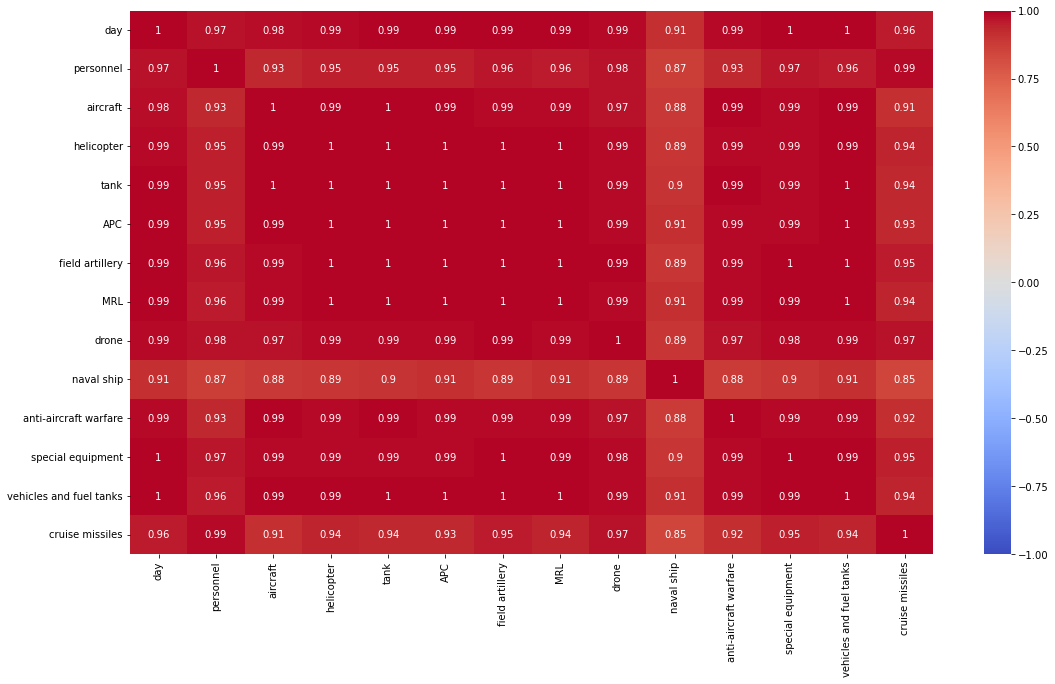

In [73]:
MatrizCorrelacao = sns.heatmap(Df.corr(),annot=True, vmax=1, vmin=-1, cmap='coolwarm');
MatrizCorrelacao.figure.set_size_inches(18,10)

# Iniciar analise exploratoria de dados

In [74]:
Plot_abates_eq_aereos = px.line(x=Df['date'], y=Df['aircraft'])
Plot_abates_eq_aereos.update_layout(title='Abate de Aviões Russos ao longo do tempo',
xaxis_title='Data',
yaxis_title='Quantidade de Aviões', 
template = 'plotly_white') #adicionando o template
Plot_abates_eq_aereos

In [80]:
import plotly.graph_objects as go
grafico = go.Figure()
grafico.add_trace(go.Scatter(x= Df['date'], y= Df['aircraft'], name = 'Aviões'))
grafico.add_trace(go.Scatter(x= Df['date'], y= Df['helicopter'], name = 'helicopteros'))
grafico.add_trace(go.Scatter(x= Df['date'], y= Df['drone'], name = 'Drones'))

#Adcionando templates do Gráfico
grafico.update_layout(title='Abates de equipamentos aéreos Russos ao longo do do tempo',
xaxis_title='Data',
yaxis_title='Equipamentos',
plot_bgcolor = 'white',
font = {'family': 'Arial','size': 16,'color': 'black'})

#Configurando a formatação
grafico.update_xaxes( showgrid=True, gridwidth=1, gridcolor='lightgray',
showline=True, linewidth=1, linecolor='black')
grafico.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray',
showline=True, linewidth=1, linecolor='black')
grafico.show()

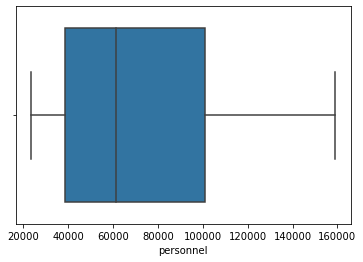

In [82]:
sns.boxplot(x=Df['personnel']);

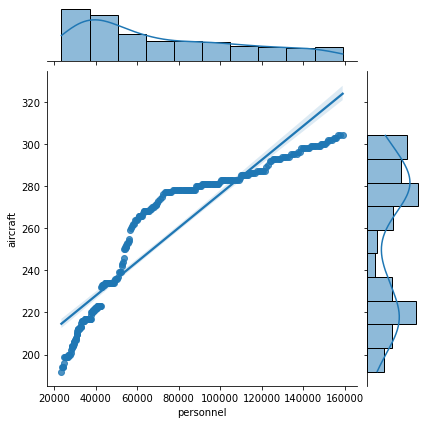

In [86]:
sns.jointplot(x=Df['personnel'], y=Df['aircraft'], kind='reg');

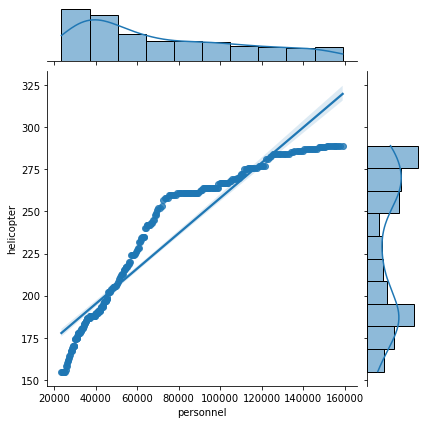

In [87]:
sns.jointplot(x=Df['personnel'], y=Df['helicopter'], kind='reg');

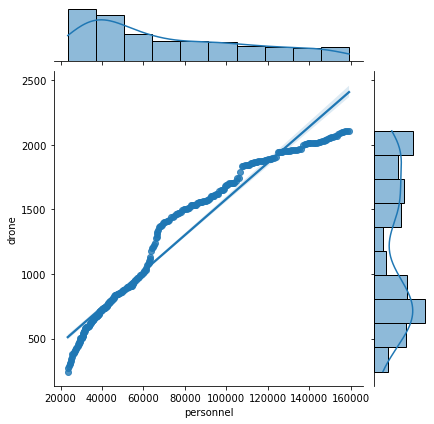

In [88]:
sns.jointplot(x=Df['personnel'], y=Df['drone'], kind='reg');

# Aplicar regressão linear

In [89]:
Df.columns

Index(['date', 'day', 'personnel', 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'drone', 'naval ship',
       'anti-aircraft warfare', 'special equipment', 'vehicles and fuel tanks',
       'cruise missiles'],
      dtype='object')

In [92]:
x_base_war = Df.iloc[:,0].values
x_base_war

array(['2022-05-01T00:00:00.000000000', '2022-05-02T00:00:00.000000000',
       '2022-05-03T00:00:00.000000000', '2022-05-04T00:00:00.000000000',
       '2022-05-05T00:00:00.000000000', '2022-05-06T00:00:00.000000000',
       '2022-05-07T00:00:00.000000000', '2022-05-08T00:00:00.000000000',
       '2022-05-09T00:00:00.000000000', '2022-05-10T00:00:00.000000000',
       '2022-05-11T00:00:00.000000000', '2022-05-12T00:00:00.000000000',
       '2022-05-13T00:00:00.000000000', '2022-05-14T00:00:00.000000000',
       '2022-05-15T00:00:00.000000000', '2022-05-16T00:00:00.000000000',
       '2022-05-17T00:00:00.000000000', '2022-05-18T00:00:00.000000000',
       '2022-05-19T00:00:00.000000000', '2022-05-20T00:00:00.000000000',
       '2022-05-21T00:00:00.000000000', '2022-05-22T00:00:00.000000000',
       '2022-05-23T00:00:00.000000000', '2022-05-24T00:00:00.000000000',
       '2022-05-25T00:00:00.000000000', '2022-05-26T00:00:00.000000000',
       '2022-05-27T00:00:00.000000000', '2022-05-28

In [94]:
y_base_war = Df.iloc[:,2].values
y_base_war

array([ 23500,  23800,  24200,  24500,  24700,  24900,  25100,  25500,
        25650,  26000,  26350,  26650,  26900,  27200,  27400,  27700,
        27900,  28300,  28500,  28700,  28850,  29050,  29200,  29350,
        29450,  29600,  29750,  30000,  30150,  30350,  30500,  30700,
        30850,  30950,  31050,  31150,  31250,  31360,  31500,  31700,
        31900,  32050,  32150,  32300,  32500,  32750,  32950,  33150,
        33350,  33600,  33800,  34100,  34230,  34430,  34530,  34700,
        34850,  35000,  35250,  35450,  35600,  35750,  35870,  35970,
        36200,  36350,  36500,  36650,  36900,  37200,  37300,  37400,
        37470,  37570,  37870,  38000,  38140,  38300,  38450,  38550,
        38750,  38850,  39000,  39240,  39520,  39700,  39870,  40070,
        40230,  40500,  40670,  40830,  41030,  41170,  41350,  41500,
        41650,  41900,  42200,  42340,  42640,  42800,  43000,  43200,
        43400,  43550,  43750,  43900,  44100,  44300,  44700,  44900,
      

In [97]:
from sklearn.preprocessing import LabelEncoder
label_encoder_data = LabelEncoder()

In [98]:
Dia = label_encoder_data.fit_transform(x_base_war[:,])
Dia

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [99]:
np.corrcoef(Dia, y_base_war)

array([[1.        , 0.96922196],
       [0.96922196, 1.        ]])

In [100]:
Dia = Dia.reshape(-1,1)
Dia.shape

(316, 1)

# Aplicação de Regresão Liner Simples

In [101]:
from sklearn.linear_model import LinearRegression
regressor_base_war = LinearRegression()

In [102]:
regressor_base_war.fit(Dia, y_base_war)

LinearRegression()

In [103]:
regressor_base_war.coef_

array([412.15057815])

In [104]:
regressor_base_war.intercept_

7386.679511240633

In [105]:
previsoes = regressor_base_war.predict(Dia)
previsoes

array([  7386.67951124,   7798.83008939,   8210.98066754,   8623.13124569,
         9035.28182383,   9447.43240198,   9859.58298013,  10271.73355828,
        10683.88413643,  11096.03471458,  11508.18529273,  11920.33587087,
        12332.48644902,  12744.63702717,  13156.78760532,  13568.93818347,
        13981.08876162,  14393.23933976,  14805.38991791,  15217.54049606,
        15629.69107421,  16041.84165236,  16453.99223051,  16866.14280865,
        17278.2933868 ,  17690.44396495,  18102.5945431 ,  18514.74512125,
        18926.8956994 ,  19339.04627755,  19751.19685569,  20163.34743384,
        20575.49801199,  20987.64859014,  21399.79916829,  21811.94974644,
        22224.10032458,  22636.25090273,  23048.40148088,  23460.55205903,
        23872.70263718,  24284.85321533,  24697.00379348,  25109.15437162,
        25521.30494977,  25933.45552792,  26345.60610607,  26757.75668422,
        27169.90726237,  27582.05784051,  27994.20841866,  28406.35899681,
        28818.50957496,  

In [106]:
Dia.ravel()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [108]:
grf_regresion = px.scatter(x = Dia.ravel(), y = y_base_war)
grf_regresion.add_scatter(x = Dia.ravel(), y = previsoes, name = 'Linha de Regressão')

#Adcionando templates do Gráfico
grf_regresion.update_layout(title='Regressão lineaar de aviões russos abatidos em função do tempo',
xaxis_title='Data',
yaxis_title='Pessoal',
plot_bgcolor = 'white',
font = {'family': 'Arial','size': 16,'color': 'black'})

#Configurando a formatação
grf_regresion.update_xaxes( showgrid=True, gridwidth=1, gridcolor='lightgray',
showline=True, linewidth=1, linecolor='black')
grf_regresion.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray',
showline=True, linewidth=1, linecolor='black')
grf_regresion.show() 